In [1]:
import os
import shutil
import keras
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Flatten,Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential
from keras.optimizers import Adam
from keras.datasets import cifar10
from sklearn.linear_model import Ridge


In [25]:
# know number of image in each class lonly

import os
def count_images_in_directory(directory):
    class_counts = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts 

train_directory = "G:\\training_set\\training_set"
test_directory = "G:\\test_set\\test_set"   
train_counts = count_images_in_directory(train_directory)
test_counts = count_images_in_directory(test_directory)
print("Training set class counts:", train_counts)
print("Testing set class counts:", test_counts)

Training set class counts: {'cats': 4001, 'dogs': 4006}
Testing set class counts: {'cats': 1012, 'dogs': 1013}


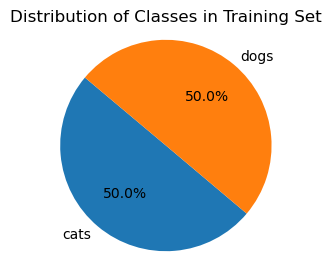

In [26]:
# using matplotlib to display pie chart of the training set
import matplotlib.pyplot as plt
# Count the number of images in each class

labels = list(train_counts.keys())
counts = list(train_counts.values())
# Create a pie chart
plt.figure(figsize=(3,3))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Classes in Training Set')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.show()

In [82]:

train_generator=ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory="G:\\training_set\\training_set",target_size=(224,224),batch_size=15,class_mode='binary')
test_generator=ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory="G:\\test_set\\test_set",target_size=(224,224),batch_size=15,class_mode='binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.8509804].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data

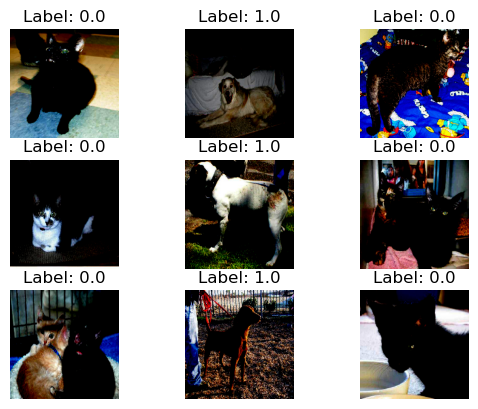

In [69]:
from cProfile import label
import matplotlib.pyplot as plt
# Display some images from the training set
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        label = Y_batch[0]
        plt.title(f"Label: {label}")
        plt.axis('off')
        plt.imshow(image)
        break

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99215686..0.88235295].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.96862745..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imsho

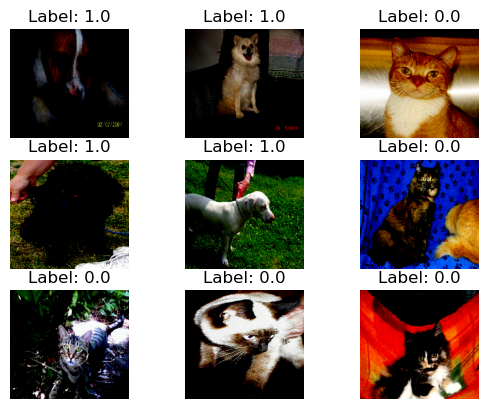

In [ ]:

# Display some images from the testing dataset
import matplotlib.pyplot as plt

for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    for X_batch, Y_batch in test_generator:
        image = X_batch[0]
        label = Y_batch[0]
        plt.title(f"Label: {label}")
        plt.axis('off')
        plt.imshow(image)
        break

plt.show()


In [ ]:
# visualize training history
import matplotlib.pyplot as plt
def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    
    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()


In [89]:

# Build CNN model
model = Sequential()
model.add(Conv2D(8, (3, 3), activation='relu', input_shape=(224, 224,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Binary classification
# summary the model
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 222, 222, 8)       224       
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 111, 111, 8)      0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 109, 109, 32)      2336      
                                                                 
 dropout_13 (Dropout)        (None, 109, 109, 32)      0         
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 54, 54, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 52, 52, 64)      

In [90]:
# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [91]:



history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    verbose=1
)

Epoch 1/10
534/534 [==============================] - 221s 411ms/step - loss: 0.6402 - accuracy: 0.6267 - val_loss: 0.5942 - val_accuracy: 0.6787
Epoch 2/10
534/534 [==============================] - 209s 391ms/step - loss: 0.5333 - accuracy: 0.7373 - val_loss: 0.5284 - val_accuracy: 0.7504
Epoch 3/10
534/534 [==============================] - 209s 392ms/step - loss: 0.4573 - accuracy: 0.7846 - val_loss: 0.5139 - val_accuracy: 0.7474
Epoch 4/10
534/534 [==============================] - 192s 360ms/step - loss: 0.3872 - accuracy: 0.8296 - val_loss: 0.5069 - val_accuracy: 0.7657
Epoch 5/10
534/534 [==============================] - 185s 347ms/step - loss: 0.3139 - accuracy: 0.8712 - val_loss: 0.5169 - val_accuracy: 0.7627
Epoch 6/10
534/534 [==============================] - 194s 364ms/step - loss: 0.2500 - accuracy: 0.8956 - val_loss: 0.5464 - val_accuracy: 0.7785
Epoch 7/10
534/534 [==============================] - 304s 569ms/step - loss: 0.2019 - accuracy: 0.9172 - val_loss: 0.5976 -

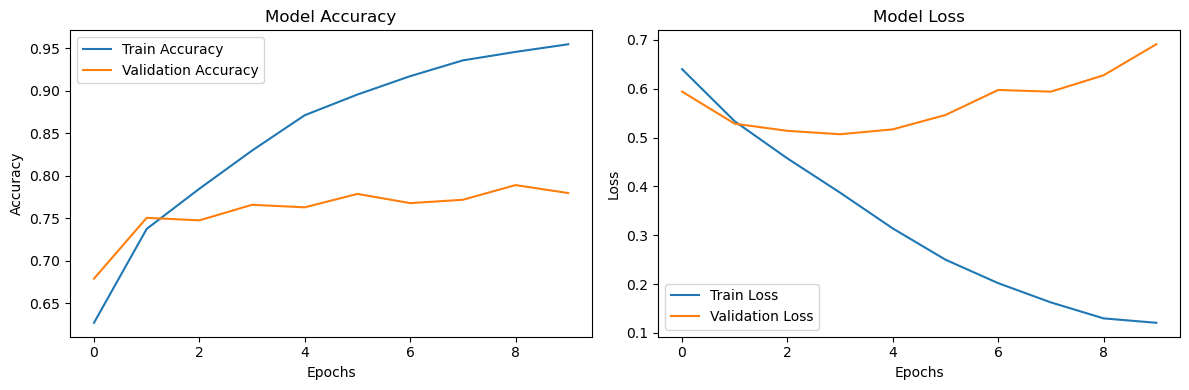

135/135 [==============================] - 15s 111ms/step - loss: 0.6912 - accuracy: 0.7795
Test Loss: 0.6911715269088745, Test Accuracy: 0.7795353531837463


In [92]:
# Plot the training history
plot_training_history(history)
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

In [35]:
import keras
import numpy as np
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.models import Model
base_model=MobileNetV2(weights="imagenet")

In [40]:
#use mobile netv2
# from keras.applications.mobilenet_v2 import MobileNetV2
# # Load the MobileNetV2 model with pre-trained weights
# base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# Freeze the base model
base_model.trainable = False
# Add custom layers on top of the base model
model = Sequential([
    base_model,
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 1000)             3538984   
 ional)                                                          
                                                                 
 flatten_3 (Flatten)         (None, 1000)              0         
                                                                 
 dense_6 (Dense)             (None, 64)                64064     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 3,603,113
Trainable params: 64,129
Non-trainable params: 3,538,984
_______________________________________

In [41]:
# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


In [44]:

# Train the model
history = model.fit(
    train_generator,
    epochs=4,
    validation_data=test_generator,
    verbose=1
)

Epoch 1/4
534/534 [==============================] - 347s 634ms/step - loss: 0.2867 - accuracy: 0.9453 - val_loss: 0.0889 - val_accuracy: 0.9768
Epoch 2/4
534/534 [==============================] - 315s 590ms/step - loss: 0.0917 - accuracy: 0.9693 - val_loss: 0.0633 - val_accuracy: 0.9778
Epoch 3/4
534/534 [==============================] - 313s 587ms/step - loss: 0.0781 - accuracy: 0.9710 - val_loss: 0.0579 - val_accuracy: 0.9773
Epoch 4/4
534/534 [==============================] - 334s 626ms/step - loss: 0.0724 - accuracy: 0.9733 - val_loss: 0.0554 - val_accuracy: 0.9783


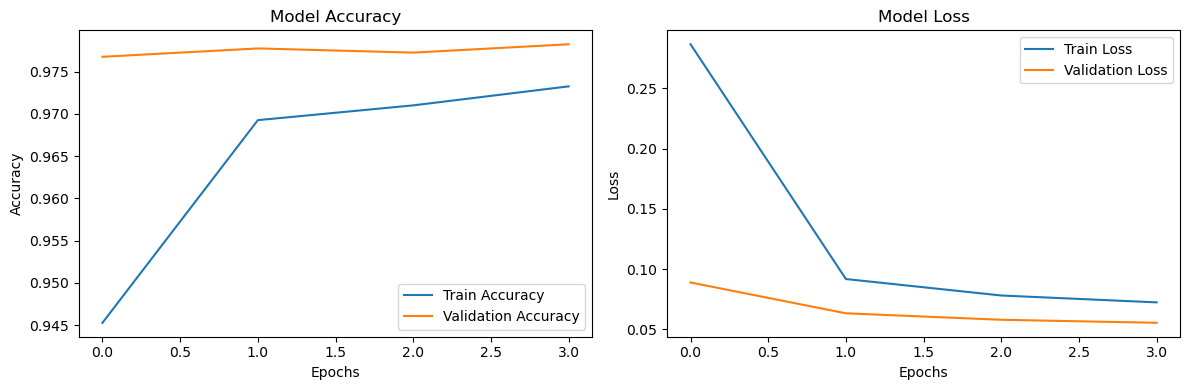

135/135 [==============================] - 81s 578ms/step - loss: 0.0554 - accuracy: 0.9783
Test Loss: 0.055409543216228485, Test Accuracy: 0.9782501459121704


In [46]:
# save model
model.save("cat_dog_mobilenetv2_model.h5")
# Load the model    
loaded_model = keras.models.load_model("cat_dog_mobilenetv2_model.h5")
# Plot the training history
plot_training_history(history)
# Evaluate the model on the test set
test_loss, test_accuracy = loaded_model.evaluate(test_generator)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")



1/1 [==============================] - 0s 97ms/step
Predicted: Cat


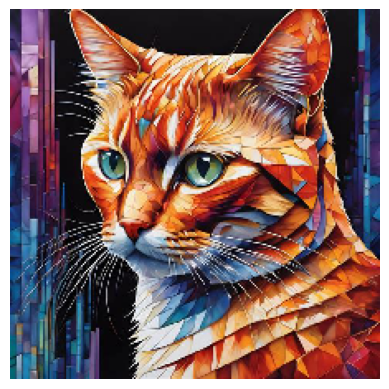

In [ ]:
# predict on a single image
from tensorflow.keras.preprocessing import image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)
    return img_array
def predict_image(model, img_path):
    img_array = load_and_preprocess_image(img_path)
    prediction = model.predict(img_array)
    return prediction[0][0]  # Return the probability for the positive class
# Example usage
img_path =r"F:\playing\deep learning proj\cat2.jpeg"  # Replace with your image path
img_path2=r"F:\playing\deep learning proj\dog.jpeg"
prediction = predict_image(loaded_model, img_path)

# Interpret the prediction
if prediction > 0.5:
    print("Predicted: Dog")
else:
    print("Predicted: Cat")
# show the image
import matplotlib.pyplot as plt
def show_image(img_path2):
    img = image.load_img(img_path, target_size=(224, 224))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
# Example usage
show_image(img_path)